# Face Recognition Notebook

## OpenCV

### Loading the dataset - Yale faces database

In [3]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
path = '/content/drive/MyDrive/My Documents/CV-Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [8]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject13.happy.gif', 'subject02.sad.gif', 'subject09.glasses.gif', 'subject15.surprised.gif', 'subject05.glasses.gif', 'subject02.rightlight.gif', 'subject13.noglasses.gif', 'subject13.centerlight.gif', 'subject14.glasses.gif', 'subject10.rightlight.gif', 'subject07.centerlight.gif', 'subject02.happy.gif', 'subject01.noglasses.gif', 'subject03.surprised.gif', 'subject12.centerlight.gif', 'subject02.glasses.gif', 'subject07.sad.gif', 'subject05.noglasses.gif', 'subject11.sad.gif', 'subject13.normal.gif', 'subject11.wink.gif', 'subject04.wink.gif', 'subject12.leftlight.gif', 'subject11.rightlight.gif', 'subject15.centerlight.gif', 'subject02.noglasses.gif', 'subject04.noglasses.gif', 'subject09.leftlight.gif', 'subject13.rightlight.gif', 'subject09.happy.gif', 'subject13.glasses.gif', 'subject02.sleepy.gif', 'subject06.wink.gif', 'subject05.sad.gif', 'subject12.glasses.gif', 'subject15.noglasses.gif', 'subject09.wink.gif', 'subject05.centerlight.gif', 'subject04.happy.gif', 'subject12

In [22]:
TRAIN_DATA_DIR = '/content/yalefaces/train'

def get_image_data():
  paths = [os.path.join(TRAIN_DATA_DIR, f) for f in os.listdir(TRAIN_DATA_DIR)]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    img = Image.open(path).convert('L')
    img_np = np.array(img, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    # print(id)
    ids.append(id)
    faces.append(img_np)

  return np.array(ids), faces

In [23]:
ids, faces = get_image_data()

In [24]:
ids

array([13,  2,  9, 15,  5,  2, 13, 13, 14, 10,  7,  2,  1,  3, 12,  2,  7,
        5, 11, 13, 11,  4, 12, 11, 15,  2,  4,  9, 13,  9, 13,  2,  6,  5,
       12, 15,  9,  5,  4, 12, 11,  4,  5,  3,  1, 14, 11,  5,  6, 15,  1,
       14, 12,  8,  4,  4,  3, 15, 11,  9,  1, 11, 10,  9,  6,  1, 11, 14,
        9, 10,  2, 15,  2, 10, 13, 10, 14,  3, 13, 14, 14, 15, 10,  7,  3,
        4,  1,  9,  4,  8,  7,  1, 13, 10,  6,  8,  5,  8, 10,  1, 15, 14,
        6,  5,  7,  8,  8,  8, 12,  3, 11,  4,  2,  8,  6,  7,  1, 12,  6,
        7,  3,  8,  9,  7,  6,  5,  6, 15, 10, 12,  3,  3, 14, 12,  7])

In [25]:
len(ids)

135

In [27]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 200, 192, 195],
        [255, 255, 255, ..., 217, 208, 217],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

### Training the LBPH classifier

In [28]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [29]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [31]:
test_img_path = '/content/yalefaces/test/subject10.sad.gif'

In [33]:
test_img = Image.open(test_img_path).convert('L')
test_img_np = np.array(test_img, 'uint8')

In [34]:
test_img_np, test_img_np.shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 241, 255, 255],
        [255, 255, 255, ..., 234, 237, 252],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [35]:
prediction = lbph_face_classifier.predict(test_img_np)
prediction

(10, 6.384336446373091)

In [37]:
expected_output = int(os.path.split(test_img_path)[1].split('.')[0].replace('subject', ''))
expected_output

10

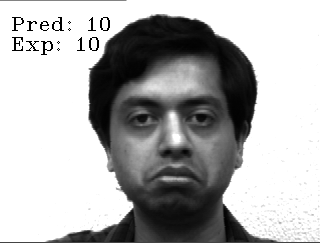

In [40]:
cv2.putText(test_img_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(test_img_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(test_img_np)